### Forecasting pollution with ARIMA 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
import os

In [16]:
os.getcwd()

'/Users/alket/Desktop/BooksAndApps/PreplyStudents/TimeSeriesAnalysis'

In [17]:
no2 = pd.read_csv('data/PM10.csv')
no2

,datetime,PM10
0,2020-01-01 00:00:00,42.0
1,2020-01-02 00:00:00,39.0
2,2020-01-03 00:00:00,49.0
3,2020-01-04 00:00:00,44.0
4,2020-01-05 00:00:00,27.0
...,...,...
287,2020-10-14 00:00:00,9.0
288,2020-10-15 00:00:00,14.0
289,2020-10-16 00:00:00,9.0
290,2020-10-17 00:00:00,10.0


In [18]:
series = no2['PM10']
type(series)

pandas.core.series.Series

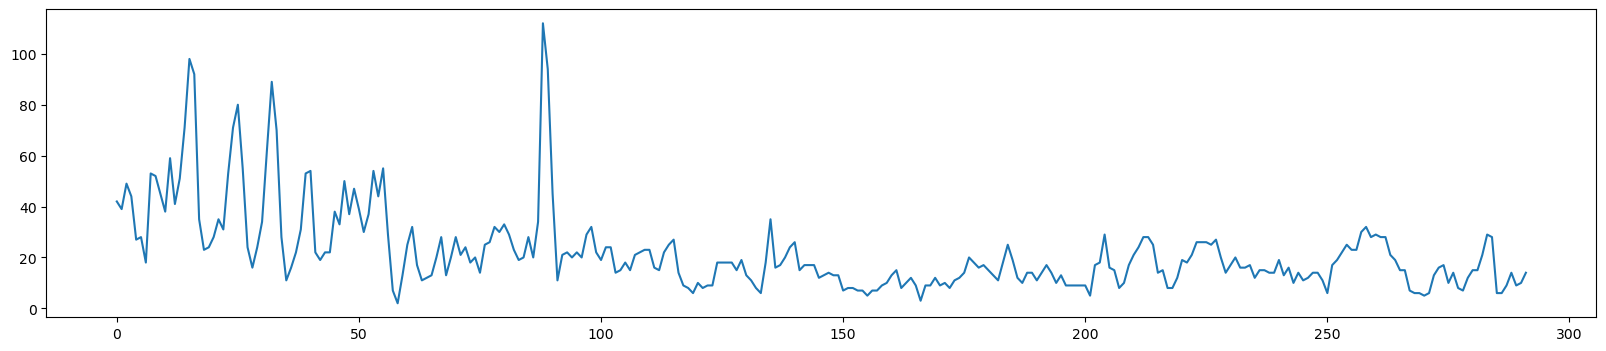

In [19]:
plt.figure(figsize = (20, 4))
plt.plot(series)
plt.show()

### Forecasting with ARIMA method

In [20]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.80)
print('-------------------- Size = ',size)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
print(size)

-------------------- Size =  233
233


In [21]:
# walk-forward validation
counter = 0
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    counter += 1
    print(counter)
    print('predicted=%f, expected=%f' % (yhat, obs))

1
predicted=16.454392, expected=16.000000
2
predicted=17.692928, expected=17.000000
3
predicted=17.142813, expected=12.000000
4
predicted=11.141171, expected=15.000000
5
predicted=17.634801, expected=15.000000
6
predicted=15.421130, expected=14.000000
7
predicted=13.359901, expected=14.000000
8
predicted=15.319855, expected=19.000000
9
predicted=18.701538, expected=13.000000
10
predicted=11.140945, expected=16.000000
11
predicted=16.882170, expected=10.000000
12
predicted=10.051838, expected=14.000000
13
predicted=14.653160, expected=11.000000
14
predicted=12.713747, expected=12.000000
15
predicted=11.709797, expected=14.000000
16
predicted=15.817010, expected=14.000000
17
predicted=12.271749, expected=11.000000
18
predicted=10.939562, expected=6.000000
19
predicted=6.358376, expected=17.000000
20
predicted=19.532730, expected=19.000000
21
predicted=17.216969, expected=22.000000
22
predicted=19.253973, expected=25.000000
23
predicted=23.372730, expected=23.000000
24
predicted=17.702085

Test RMSE: 4.958


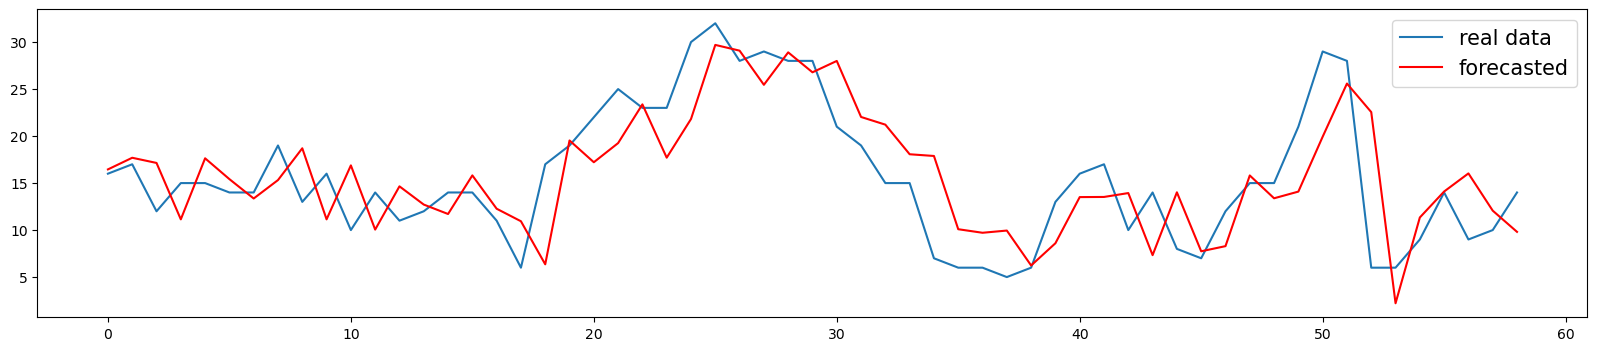

In [22]:
# evaluate forecasts
import math
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.figure(figsize = (20, 4))
plt.plot(test, label='real data')
plt.plot(predictions, color='red', label='forecasted')
plt.legend(prop={'size': 15})
plt.show()

In [23]:
diff = test - predictions

In [24]:
diff

array([ -0.45439169,  -0.69292792,  -5.14281283,   3.858829  ,
        -2.63480117,  -1.42113045,   0.64009926,   3.68014494,
        -5.70153785,   4.85905493,  -6.88216993,   3.94816221,
        -3.65315965,  -0.71374665,   2.29020259,  -1.81700993,
        -1.27174865,  -4.93956191,  10.6416244 ,  -0.5327303 ,
         4.78303146,   5.74602745,  -0.37272968,   5.29791532,
         8.18541165,   2.30134385,  -1.0877368 ,   3.54500557,
        -0.90624786,   1.21649901,  -6.99364287,  -3.03211235,
        -6.21568504,  -3.06595066, -10.8837934 ,  -4.09113872,
        -3.7139337 ,  -4.94871826,  -0.2339139 ,   4.39902356,
         2.49179817,   3.47590372,  -3.93751037,   6.66711133,
        -6.01798717,  -0.74403016,   3.70934526,  -0.81056462,
         1.61762724,   6.90601137,   9.06911098,   2.41245261,
       -16.55004268,   3.78701632,  -2.34030504,  -0.10322241,
        -7.02770941,  -2.06607496,   4.19012762])

In [25]:
# compute the mean absolute error
mae = np.mean(abs(diff))
mae

3.910502692052697

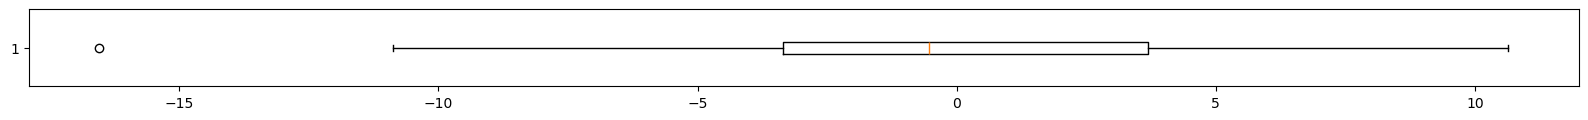

In [26]:
plt.figure(figsize = (20, 1))
plt.boxplot(diff, vert = False)
#plt.plot(test[0])
plt.show()

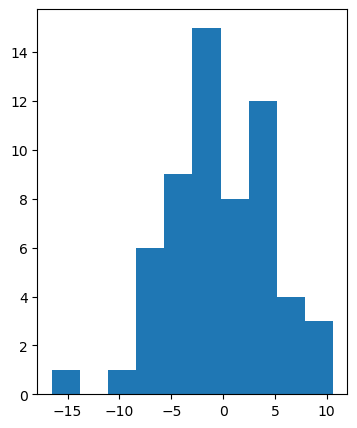

In [27]:
plt.figure(figsize = (4, 5))
plt.hist(diff)
#plt.plot(test[0])
plt.show()